In [ ]:
# common packages 
import os, cv2,logging,sys
import copy,math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
train=pd.read_csv('train.csv')

In [ ]:
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [ ]:
train.dtypes

image_name                        object
patient_id                        object
sex                               object
age_approx                       float64
anatom_site_general_challenge     object
diagnosis                         object
benign_malignant                  object
target                             int64
dtype: object

In [ ]:
train.describe(percentiles=np.arange(10)/10.0)

,age_approx,target
count,33058.000000,33126.000000
mean,48.870016,0.017630
std,14.380360,0.131603
min,0.000000,0.000000
0%,0.000000,0.000000
10%,30.000000,0.000000
20%,35.000000,0.000000
30%,40.000000,0.000000
40%,45.000000,0.000000
50%,50.000000,0.000000


In [ ]:
(pd.isnull(train).sum()/len(train)).apply(lambda x:'{:.2%}'.format(x))

image_name                       0.00%
patient_id                       0.00%
sex                              0.20%
age_approx                       0.21%
anatom_site_general_challenge    1.59%
diagnosis                        0.00%
benign_malignant                 0.00%
target                           0.00%
dtype: object

As there are only less number of rows with missing values I have just removed them

In [ ]:
train=train.dropna()

In [ ]:
malignant=train[train['target']==1]

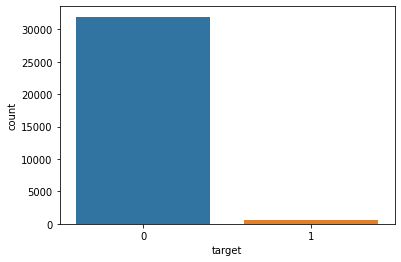

0    31956
1      575
Name: target, dtype: int64


In [ ]:
sns.countplot(x=train['target'],data=train)
plt.show()
print(train['target'].value_counts())


#Imbalanced dataset
We can say that data is heavily imbalanced


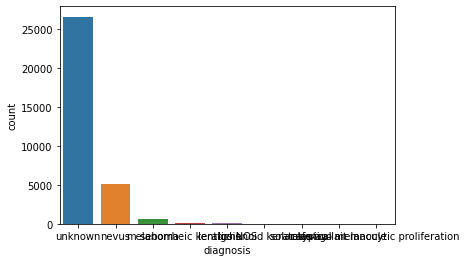

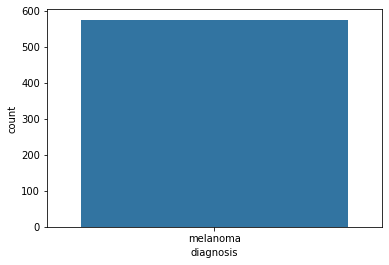

unknown                               26590
nevus                                  5147
melanoma                                575
seborrheic keratosis                    130
lentigo NOS                              44
lichenoid keratosis                      36
solar lentigo                             7
atypical melanocytic proliferation        1
cafe-au-lait macule                       1
Name: diagnosis, dtype: int64


,target
diagnosis,
atypical melanocytic proliferation,0
cafe-au-lait macule,0
lentigo NOS,0
lichenoid keratosis,0
melanoma,575
nevus,0
seborrheic keratosis,0
solar lentigo,0
unknown,0


In [ ]:
sns.countplot(x=train['diagnosis'],data=train)
plt.show()
sns.countplot(x=malignant['diagnosis'],data=train)
plt.show()
print(train['diagnosis'].value_counts())
train.pivot_table(values='target',index='diagnosis',aggfunc=np.sum,margins=True)

In the dataset we have images with different diagnosis.

We are trying to find malignant or not for only melanoma given any image (image without any diagnosis or with other diagnosis).

Column value is unknown so we don't know whether that person is diagnosed or not.

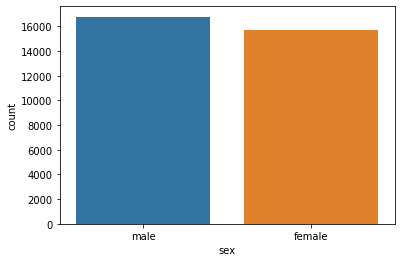

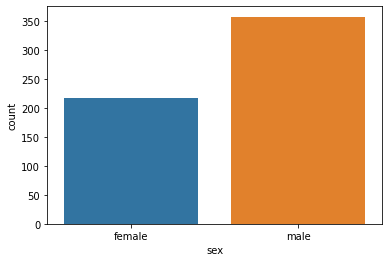

male      16788
female    15743
Name: sex, dtype: int64


,target
sex,
female,217
male,358
All,575


In [ ]:
sns.countplot(x=train['sex'],data=train)
plt.show()
sns.countplot(x=malignant['sex'],data=train)
plt.show()
print(train['sex'].value_counts())
train.pivot_table(values='target',index='sex',aggfunc=np.sum,margins=True)

We can't conclude anything based on the sex v/s target  

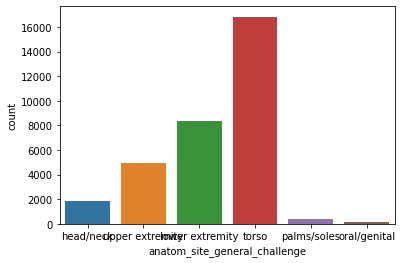

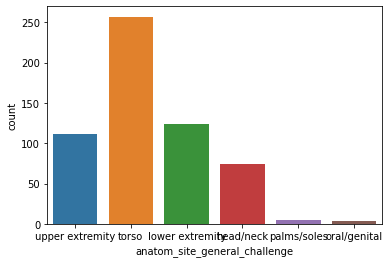

torso              16825
lower extremity     8399
upper extremity     4963
head/neck           1845
palms/soles          375
oral/genital         124
Name: anatom_site_general_challenge, dtype: int64


,target
anatom_site_general_challenge,
head/neck,74
lower extremity,124
oral/genital,4
palms/soles,5
torso,257
upper extremity,111
All,575


In [ ]:
sns.countplot(x=train['anatom_site_general_challenge'],data=train)
plt.show()
sns.countplot(x=malignant['anatom_site_general_challenge'],data=train)
plt.show()
print(train['anatom_site_general_challenge'].value_counts())
train.pivot_table(values='target',index='anatom_site_general_challenge',aggfunc=np.sum,margins=True)

From above visulaisations we can conclude that the data is more for torso, lower extremity, upper extremity. It might be hard to classify whether an image is malignant or not for oral/genital and palms/soles anatom_sites images

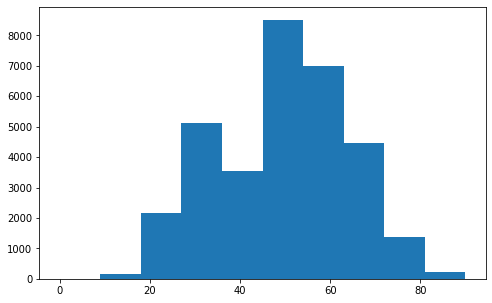

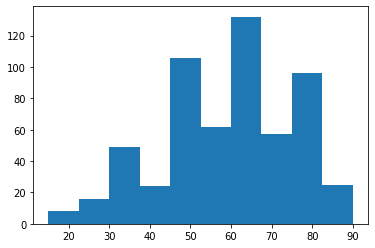

45.0    4286
50.0    4224
55.0    3785
40.0    3531
60.0    3201
35.0    2802
65.0    2500
30.0    2318
70.0    1949
25.0    1523
75.0     974
20.0     642
80.0     416
85.0     149
15.0     132
90.0      80
10.0      17
0.0        2
Name: age_approx, dtype: int64


,target
age_approx,
0.0,0
10.0,0
15.0,2
20.0,6
25.0,16
30.0,24
35.0,25
40.0,24
45.0,53


In [ ]:
plt.figure(figsize=(8,5))
plt.hist(train['age_approx'])
plt.show()
plt.hist(malignant['age_approx'])
plt.show()

# plt.xlim(0,100)
print(train['age_approx'].value_counts())

train.pivot_table(values='target',index='age_approx',aggfunc=np.sum,margins=True)

From above visualizations we can say that we can't really predict whether a person aged below 20 and above 80 has malignant tumor or not because we don't have much training data for those age groups.